importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as plt

converting the csv file into DataFrame

In [2]:
df=pd.read_csv("BlackFriday.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


calculating the null values in each column

In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

As the number of null values is more in columns Product_Category_2,Product_Category_3 we will be deleting the columns

In [5]:
df.drop(columns=["Product_Category_2","Product_Category_3"],inplace=True,axis=1)

In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

checking for duplicated values

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
537572    False
537573    False
537574    False
537575    False
537576    False
Length: 537577, dtype: bool

No duplicated values were founded

Finding the unique values in each column

In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

Using distplot to understand the Distribution of purchases

C:\Users\venna\AppData\Local\Temp\ipykernel_21732\2854282472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Purchase"])


<Axes: xlabel='Purchase', ylabel='Density'>

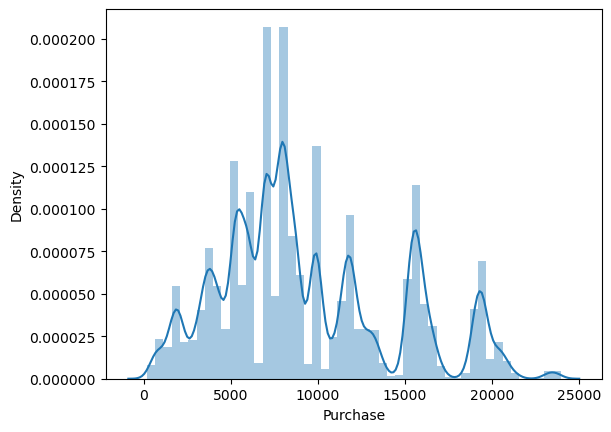

In [9]:
sns.distplot(df["Purchase"])

From the distribution graph, it is evident that the data does not follow a normal distribution. The purchasing range spans from ₹1,000 to ₹25,000 with a significant concentration of purchases occurring between ₹1,000 and ₹14,000. Notable clusters of outliers are observed between ₹5,000 and ₹10,000, suggesting a higher frequency of purchases within this range.

creating and saving the processed dataset into a new csv file

In [10]:
df.to_csv("cleaned_BlackFriday_sales.csv")